In [2]:
import zipfile
import os

# Path to your uploaded zip file (update the filename if different)
zip_path = "/content/merged_dataset.zip"
extract_path = "/content/"

# Unzip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Dataset extracted to:", extract_path)
print("Contents:", os.listdir(extract_path))


✅ Dataset extracted to: /content/
Contents: ['.config', 'merged_dataset', 'merged_dataset.zip', 'sample_data']


In [3]:
import os, random, shutil

# Paths
dataset_path = "/content/merged_dataset"
images_path = os.path.join(dataset_path, "images")
labels_path = os.path.join(dataset_path, "labels")

# Create train/val folders
for split in ["train", "val"]:
    os.makedirs(os.path.join(dataset_path, "images", split), exist_ok=True)
    os.makedirs(os.path.join(dataset_path, "labels", split), exist_ok=True)

# Split dataset (80% train, 20% val)
image_files = os.listdir(images_path)
image_files = [f for f in image_files if f.endswith(".jpg")]

random.shuffle(image_files)
split_index = int(0.8 * len(image_files))
train_files = image_files[:split_index]
val_files = image_files[split_index:]

def move_files(files, split):
    for f in files:
        shutil.copy(os.path.join(images_path, f), os.path.join(dataset_path, "images", split, f))
        label_file = f.replace(".jpg", ".txt")
        shutil.copy(os.path.join(labels_path, label_file), os.path.join(dataset_path, "labels", split, label_file))

move_files(train_files, "train")
move_files(val_files, "val")

print("✅ Dataset split completed!")


✅ Dataset split completed!


In [5]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # nano version

model.train(
    data="/content/data.yaml",
    epochs=30,
    imgsz=640,
    batch=16,
    name="coupon_detector_nano"
)


Ultralytics 8.3.202 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=coupon_detector_nano2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, 

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c1769d14800>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [6]:
from ultralytics import YOLO

# Load your best trained weights
model = YOLO("/content/runs/detect/coupon_detector_nano2/weights/best.pt")

# Run evaluation on the validation set
metrics = model.val(data="/content/data.yaml", imgsz=640, batch=16)

# Print overall metrics
print("✅ Evaluation Results:")
print(f"Precision: {metrics.results_dict['metrics/precision(B)']:.4f}")
print(f"Recall:    {metrics.results_dict['metrics/recall(B)']:.4f}")
print(f"mAP50:     {metrics.results_dict['metrics/mAP50(B)']:.4f}")
print(f"mAP50-95:  {metrics.results_dict['metrics/mAP50-95(B)']:.4f}")


Ultralytics 8.3.202 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2411.4±668.5 MB/s, size: 78.9 KB)
val: Scanning /content/merged_dataset/labels/val.cache... 336 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 336/336 674.3Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 3.9it/s 5.4s
                   all        336        919      0.985      0.993      0.993      0.728
                bucket        334        474      0.987      0.994      0.994      0.797
                coupon        324        445      0.982      0.993      0.992       0.66
Speed: 0.6ms preprocess, 5.5ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to /content/runs/detect/val
✅ Evaluation Results:
Precision: 0.9847
Recall:    0.9934
mAP50:     0.9930
mAP50-95:  0.7284


In [7]:
# Per-class metrics
print("\nClass-wise metrics:")
for i, name in model.names.items():
    print(f"{name}: mAP50={metrics.maps[i]:.4f}, mAP50-95={metrics.maps[i]:.4f}")



Class-wise metrics:
bucket: mAP50=0.7971, mAP50-95=0.7971
coupon: mAP50=0.6597, mAP50-95=0.6597


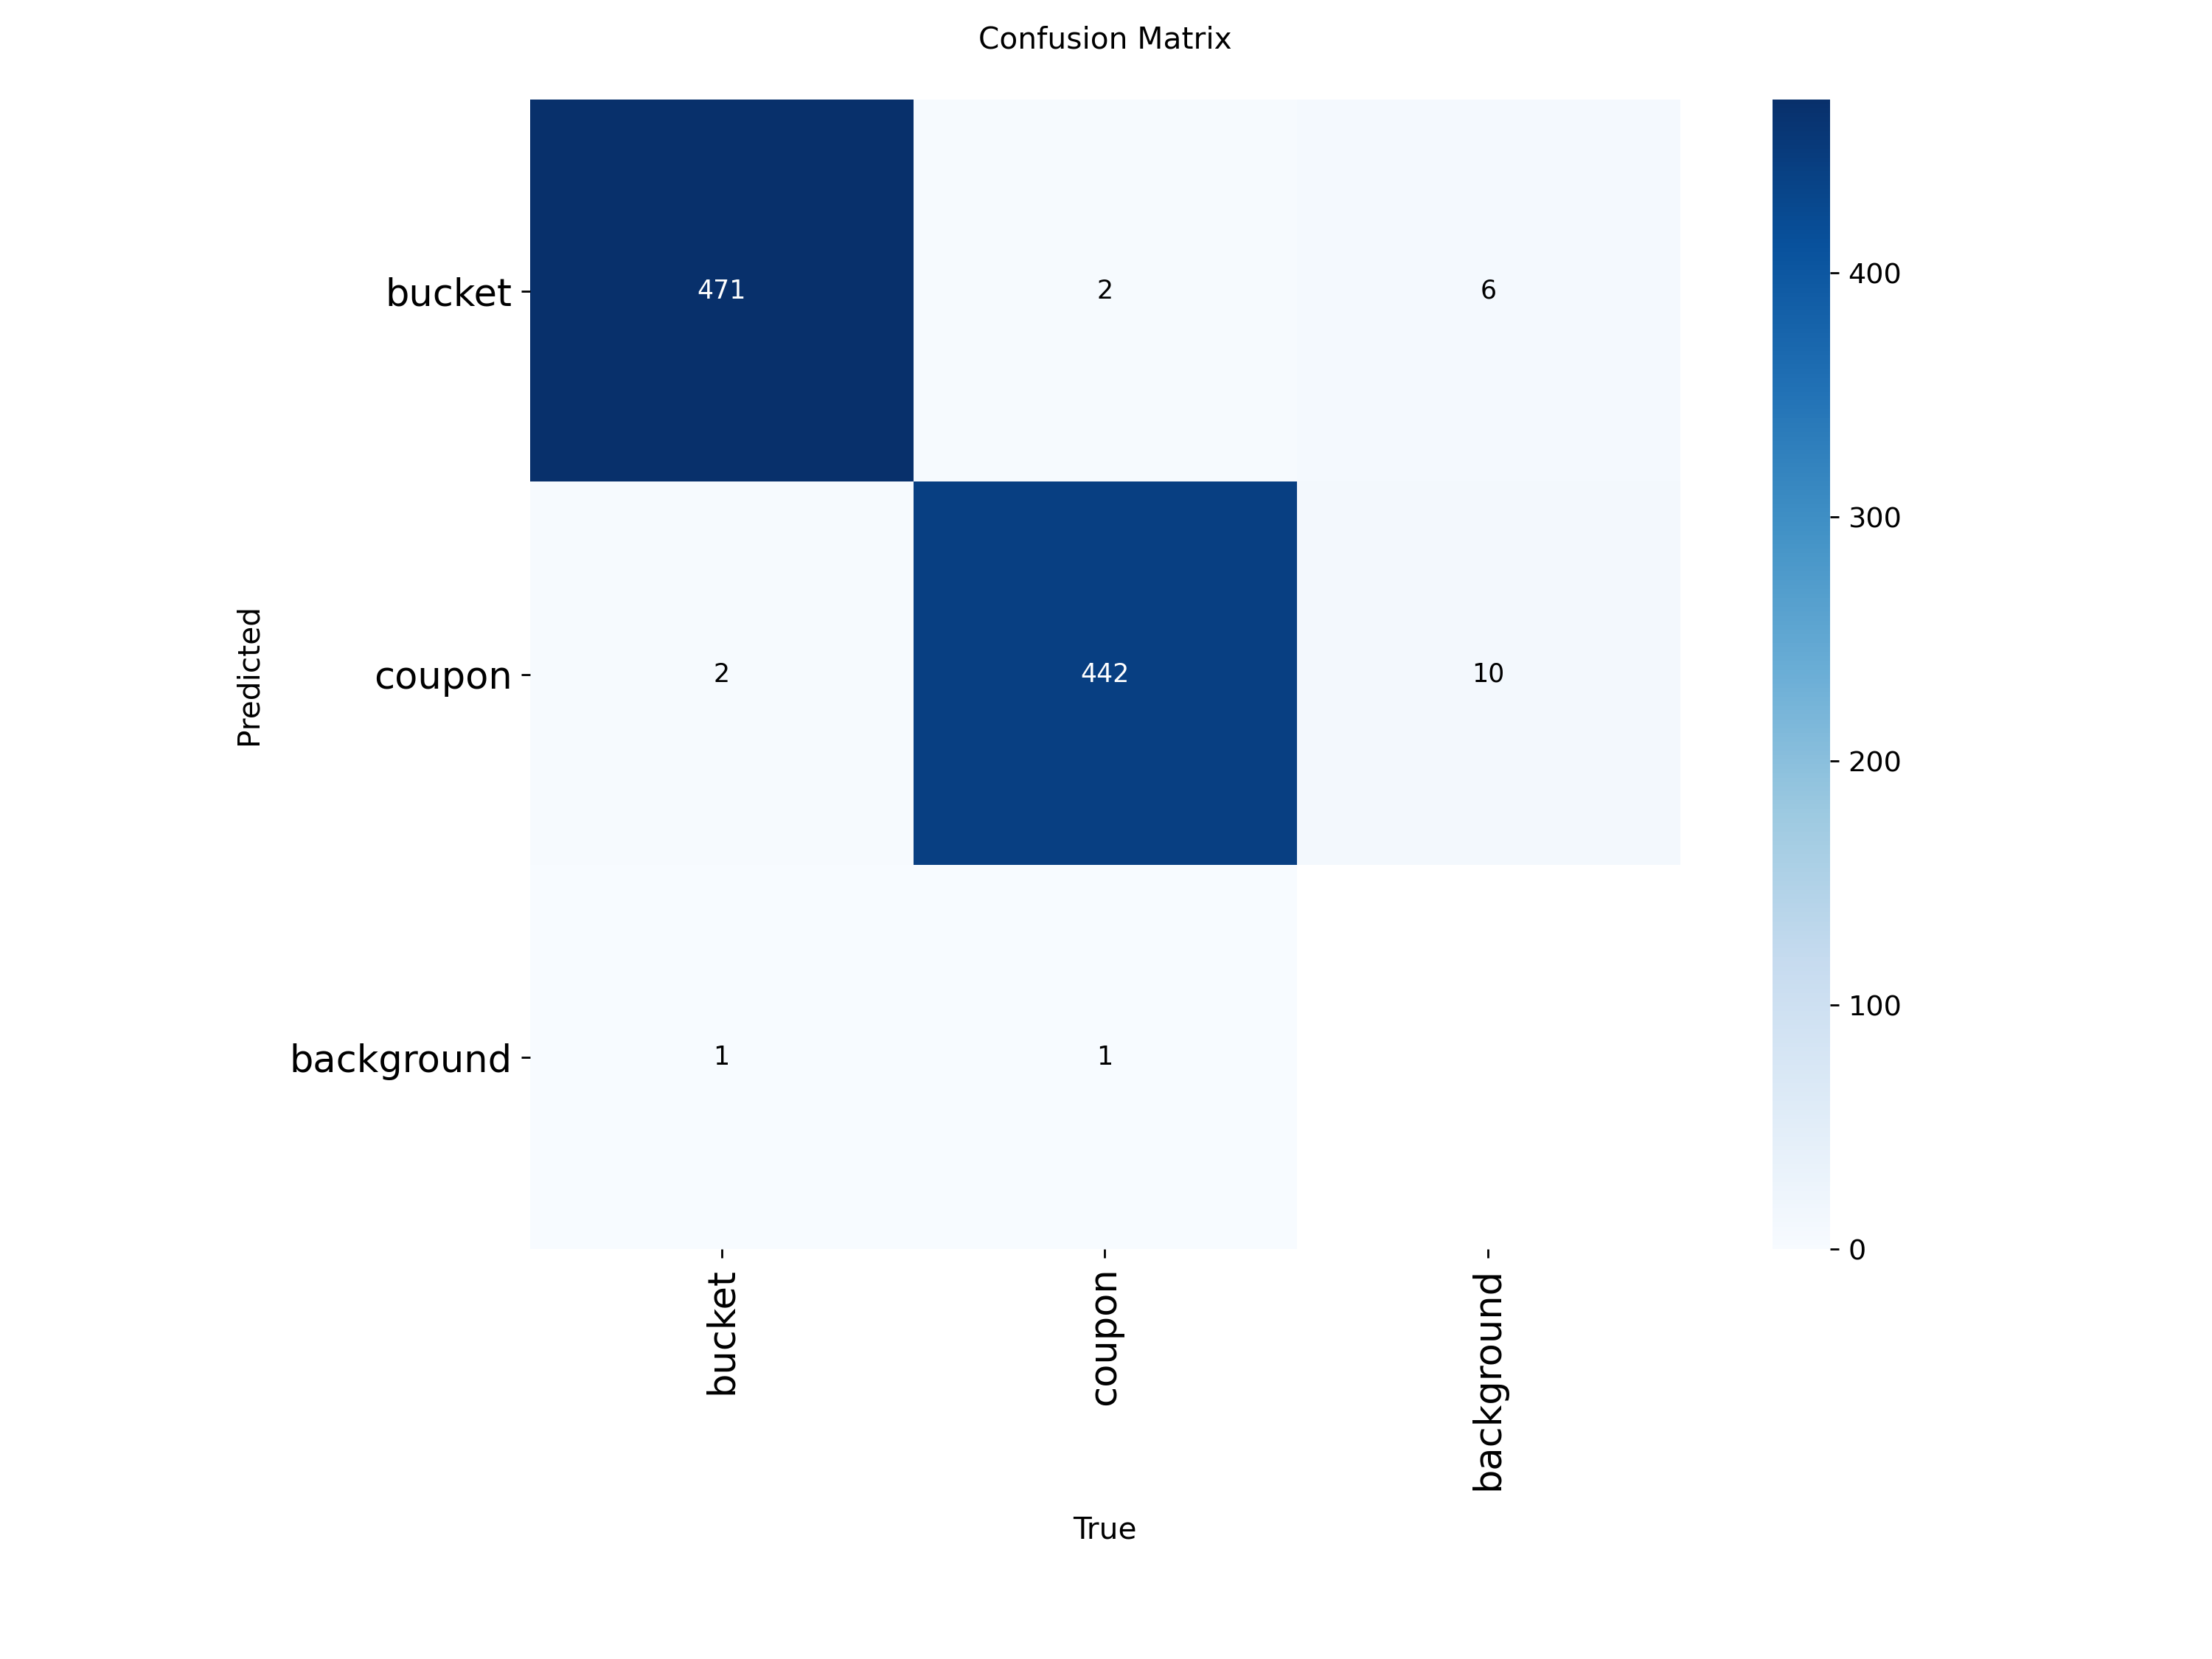

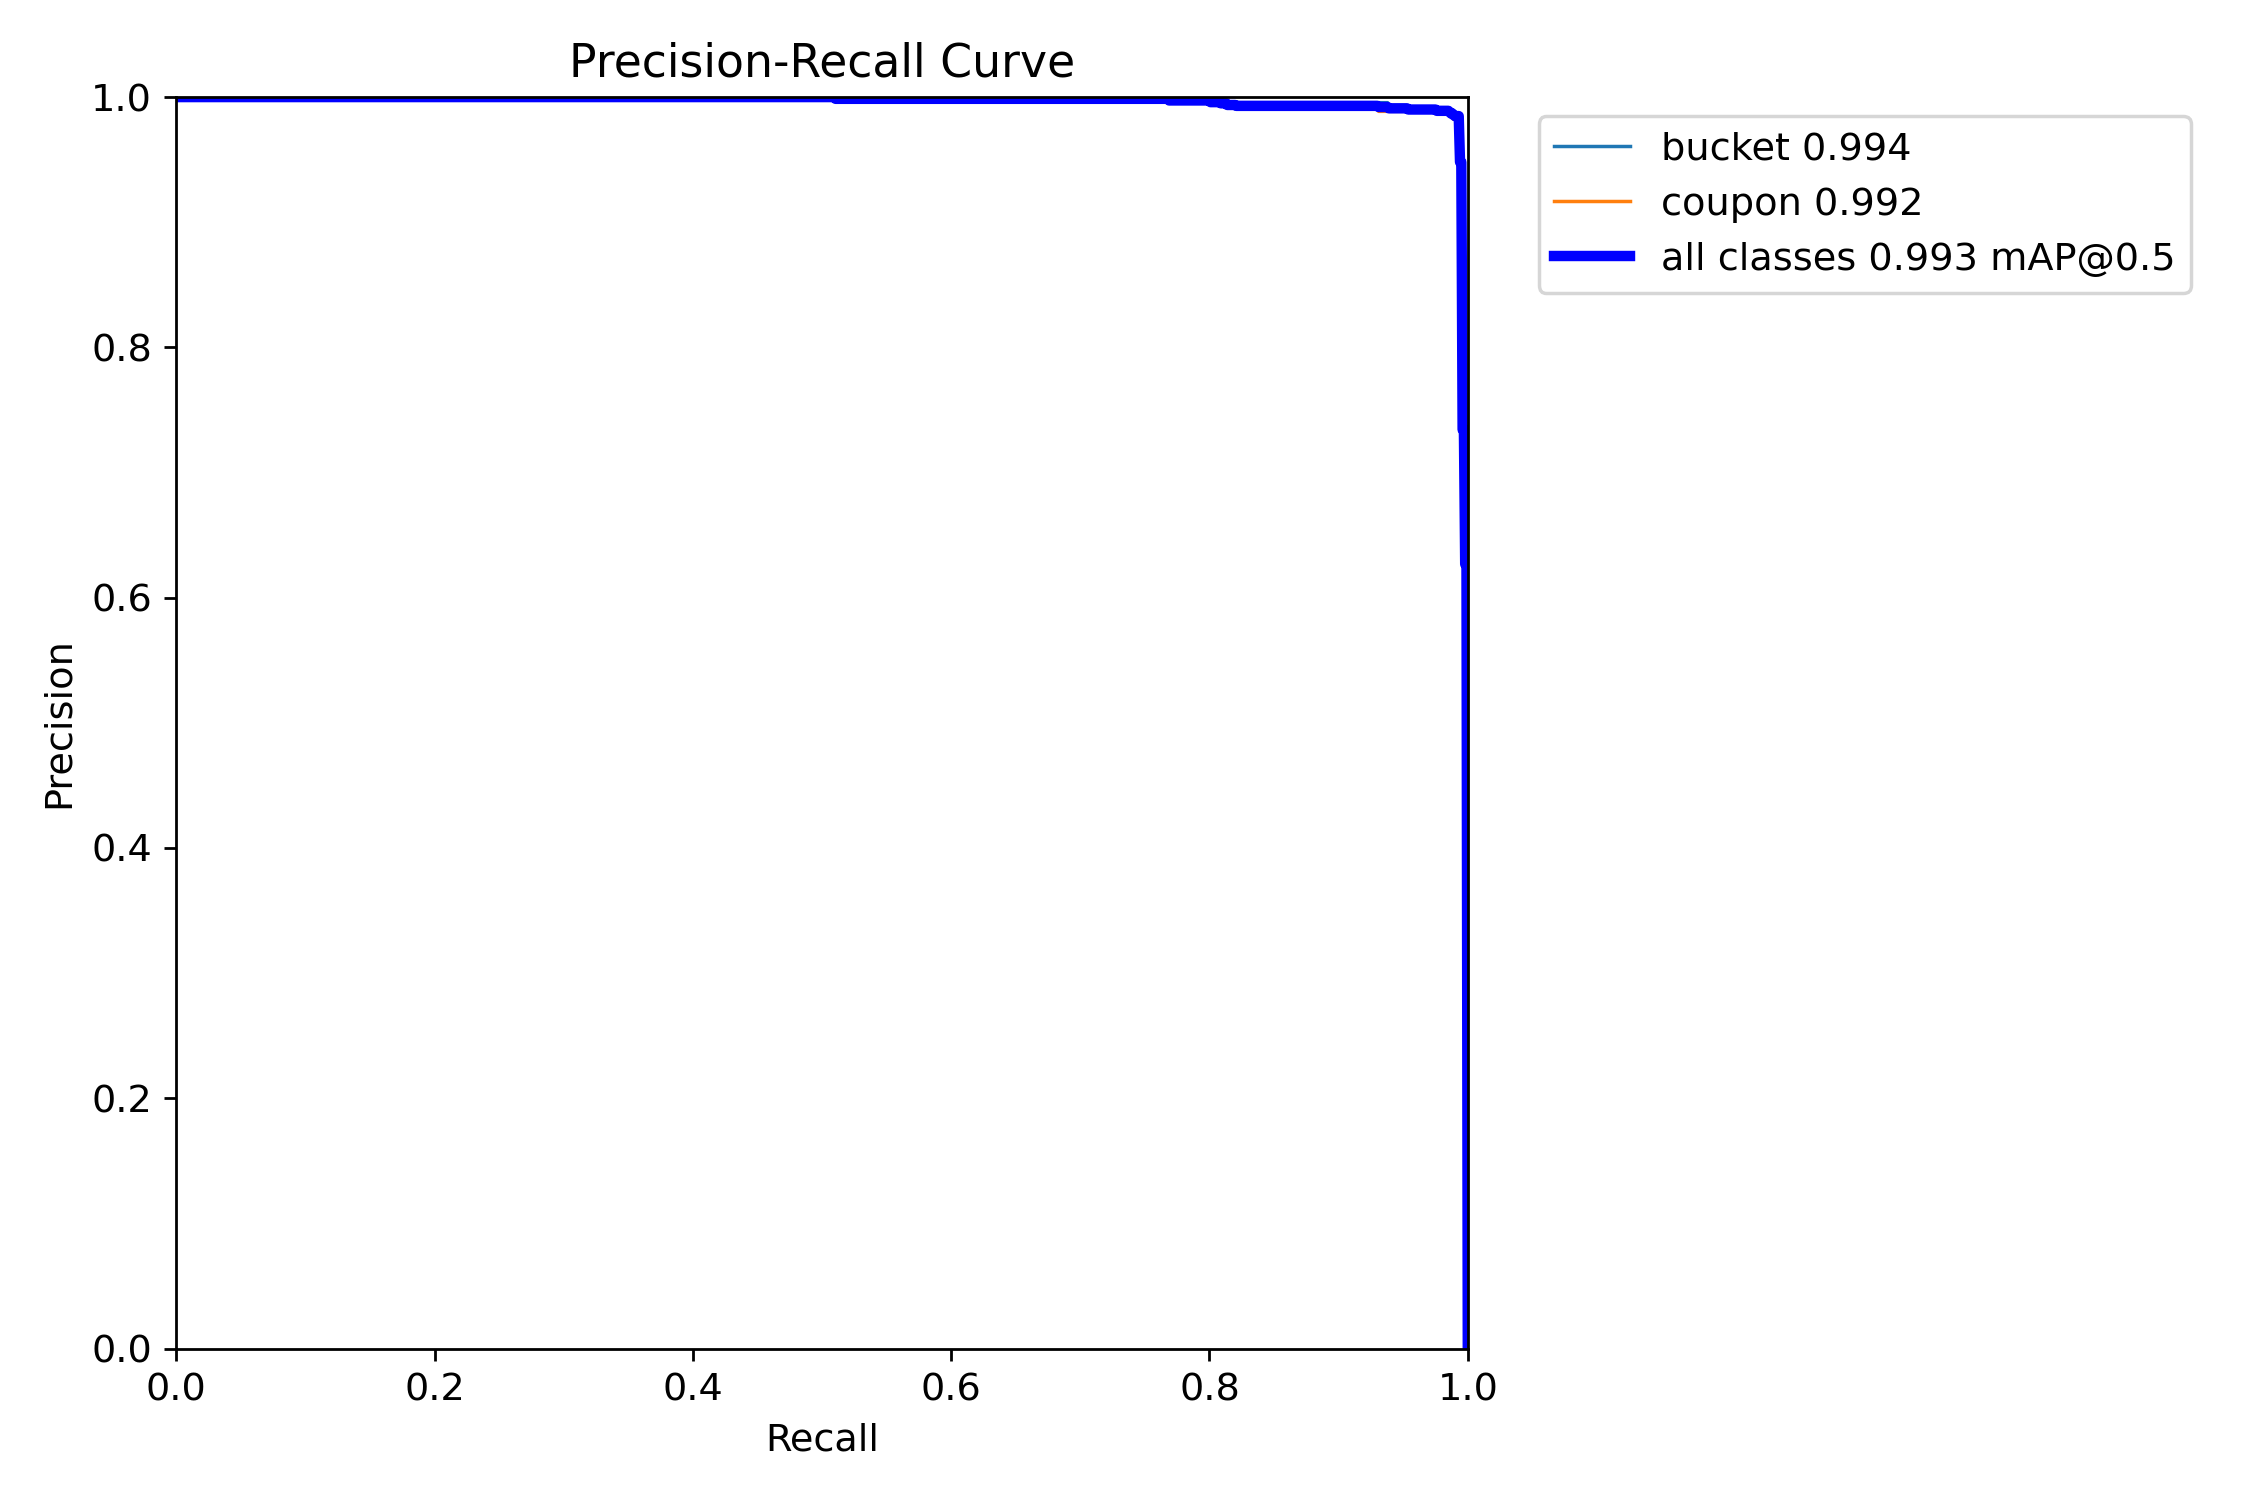

In [8]:
import glob
from IPython.display import Image, display

# Show confusion matrix
conf_matrix = glob.glob("/content/runs/detect/coupon_detector_nano2/*confusion_matrix.png")[0]
display(Image(filename=conf_matrix))

# Show PR curve
pr_curve = glob.glob("/content/runs/detect/coupon_detector_nano2/*PR_curve.png")[0]
display(Image(filename=pr_curve))


Saving img_001625.jpg to img_001625.jpg

image 1/1 /content/img_001625.jpg: 640x640 1 bucket, 1 coupon, 8.1ms
Speed: 2.3ms preprocess, 8.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict


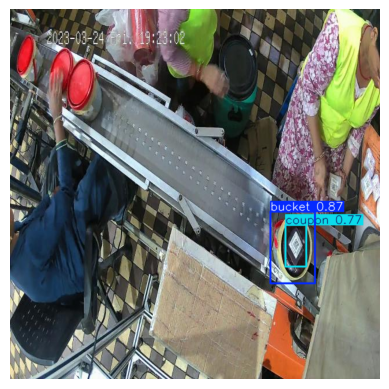

In [9]:
from google.colab import files
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt

# Upload image from your local machine
uploaded = files.upload()

# Get the uploaded file name
img_path = list(uploaded.keys())[0]

# Load your trained YOLO model
model = YOLO("/content/runs/detect/coupon_detector_nano2/weights/best.pt")

# Run prediction
results = model.predict(source=img_path, conf=0.5, save=True)

# Display the result
result_img = results[0].plot()  # get plotted image (numpy array)
plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
